In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("dataset/US_Accidents_March23.csv")
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [16]:
#  dataset exploration
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

((7728394, 46), None)

In [17]:
df.isnull().sum().head(20)


ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402762
End_Lng              3402762
Distance(mi)               0
Description                5
Street                 10869
City                     253
County                     0
State                      0
Zipcode                 1915
Country                    0
Timezone                7808
Airport_Code           22635
Weather_Timestamp     120228
dtype: int64

In [18]:
#  Check for fractional seconds in datetime fields
bad_start = df['Start_Time'].astype(str).str.contains(r'\.\d+$', regex=True).sum()
bad_end   = df['End_Time'].astype(str).str.contains(r'\.\d+$', regex=True).sum()
bad_start, bad_end


(np.int64(743166), np.int64(743166))

In [19]:
#  Remove fractional seconds from Start_Time and End_Time

df['Start_Time'] = df['Start_Time'].astype(str).str.replace(r'\.\d+$', '', regex=True)
df['End_Time']   = df['End_Time'].astype(str).str.replace(r'\.\d+$', '', regex=True)


In [20]:
df['Start_Time'].head()


0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object

In [21]:
# Convert cleaned datetime strings into proper datetime format

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time']   = pd.to_datetime(df['End_Time'], errors='coerce')

# Check conversion success (NaT = failed)
df['Start_Time'].isna().sum(), df['End_Time'].isna().sum()


(np.int64(0), np.int64(0))

In [22]:
#  Create useful time features for analysis
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month


df[['Start_Time','Hour','Weekday','Month']].head()


,Start_Time,Hour,Weekday,Month
0,2016-02-08 05:46:00,5,Monday,2
1,2016-02-08 06:07:59,6,Monday,2
2,2016-02-08 06:49:27,6,Monday,2
3,2016-02-08 07:23:34,7,Monday,2
4,2016-02-08 07:39:07,7,Monday,2


In [23]:
#  Drop columns with very high missing values
cols_to_drop = ['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Weather_Timestamp']
df = df.drop(columns=cols_to_drop)
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Month
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,Night,Night,Night,Night,5,Monday,2
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,Night,Night,Night,Day,6,Monday,2
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,True,False,Night,Night,Day,Day,6,Monday,2
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,Night,Day,Day,Day,7,Monday,2
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,True,False,Day,Day,Day,Day,7,Monday,2


In [24]:
#  Remove duplicate rows
before = df.shape
df = df.drop_duplicates()
after = df.shape

before, after


((7728394, 45), (7728394, 45))

In [25]:
#  Fill missing values in categorical columns with 'Unknown'
fill_unknown_cols = ['Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code']

for col in fill_unknown_cols:
    df[col] = df[col].fillna('Unknown')

df[fill_unknown_cols].isnull().sum()


Street          0
City            0
Zipcode         0
Timezone        0
Airport_Code    0
dtype: int64

In [26]:
#  Fill numeric weather missing values with median
weather_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)']

for col in weather_cols:
    df[col] = df[col].fillna(df[col].median())


df[weather_cols].isnull().sum()


Temperature(F)    0
Humidity(%)       0
Pressure(in)      0
dtype: int64

 Milestone-2: Univariate Analysis

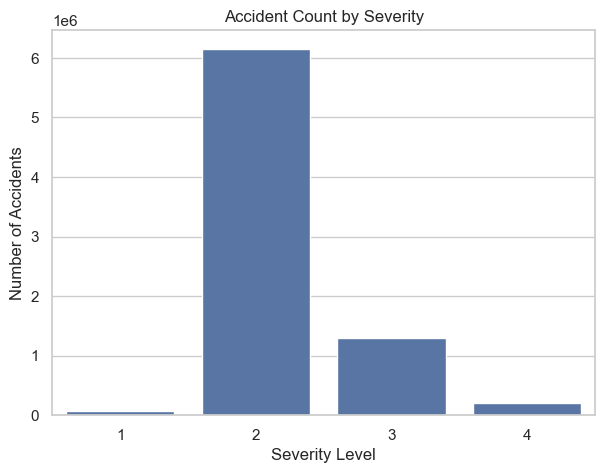

In [27]:
#  Severity distribution 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

severity_counts = df['Severity'].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.barplot(x=severity_counts.index, y=severity_counts.values)

plt.title("Accident Count by Severity")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()


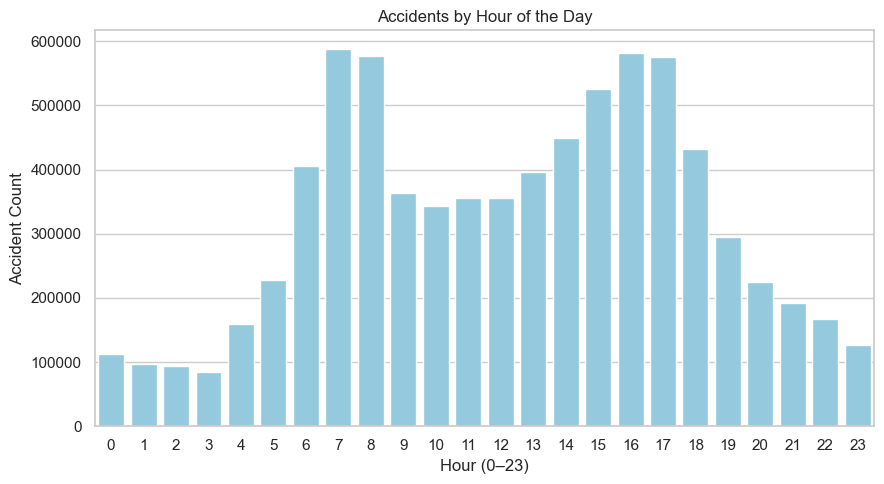

In [28]:
#  Hour-wise accident distribution

plt.figure(figsize=(9,5))
sns.countplot(x=df['Hour'], color='skyblue')

plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


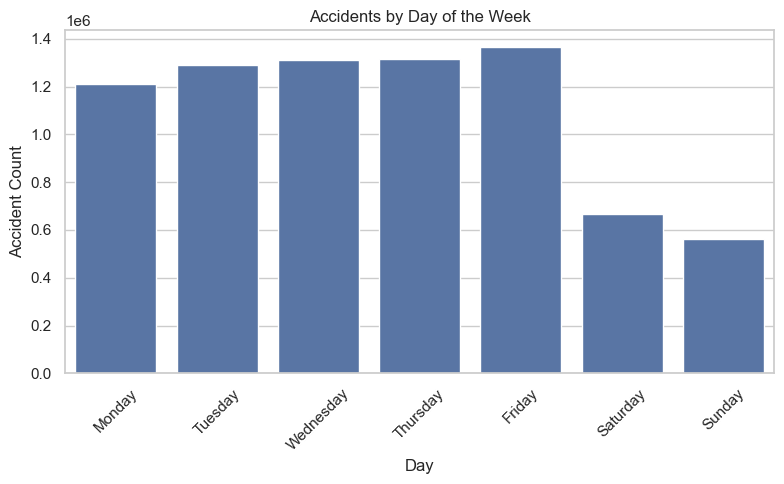

In [29]:
#  Accidents by Day of Week

plt.figure(figsize=(8,5))
sns.countplot(x=df['Weekday'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


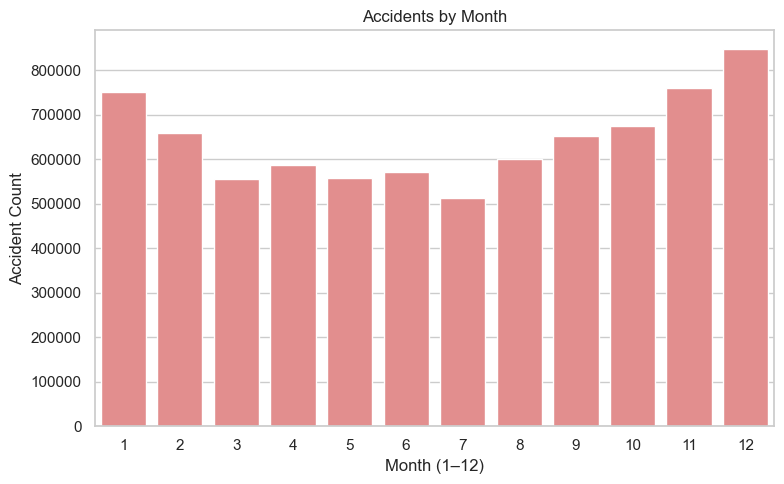

In [30]:
# Accidents by Month

plt.figure(figsize=(8,5))
sns.countplot(x=df['Month'], color='lightcoral')

plt.title("Accidents by Month")
plt.xlabel("Month (1–12)")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


In [31]:
df['Weather_Condition'].value_counts().head(10)


Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

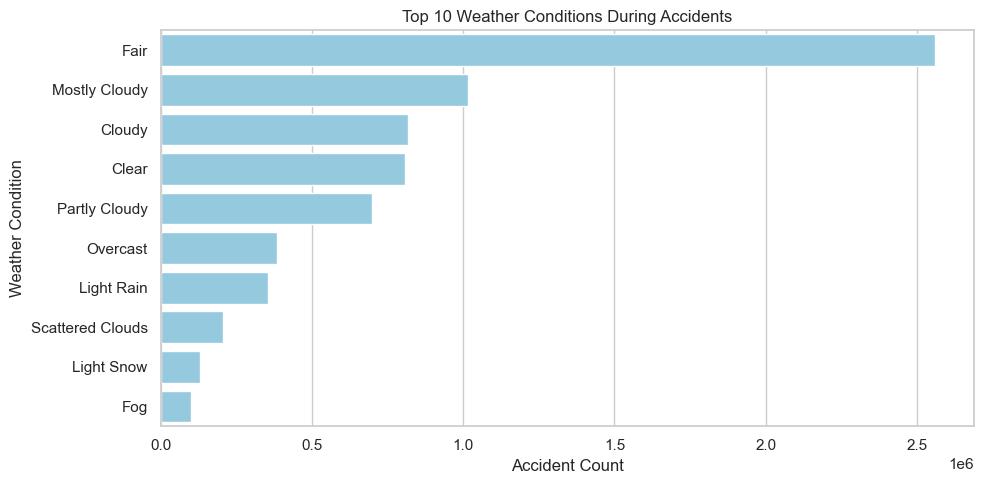

In [32]:
#  Top Weather Conditions During Accidents

top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index, color='skyblue')

plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


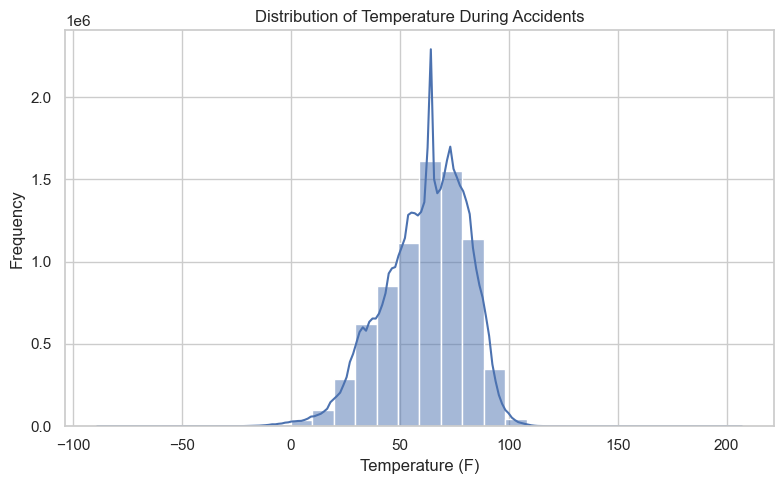

In [33]:
#  Distribution of Temperature during accidents

plt.figure(figsize=(8,5))
sns.histplot(df['Temperature(F)'], bins=30, kde=True)

plt.title("Distribution of Temperature During Accidents")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


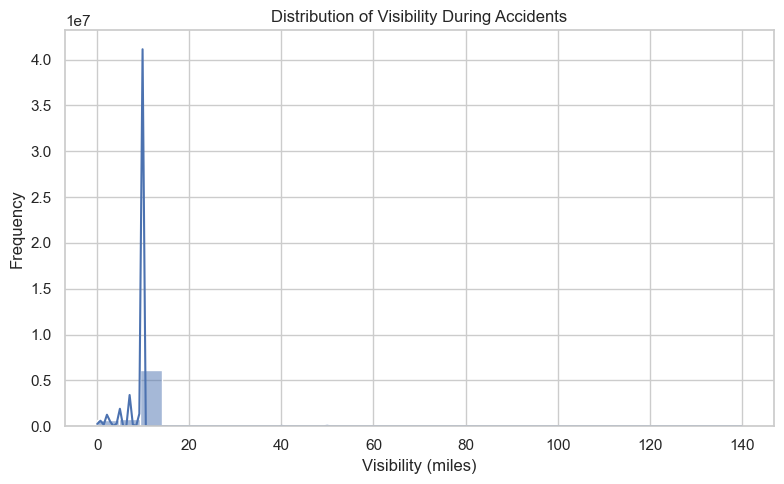

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Visibility(mi)'], bins=30, kde=True)

plt.title("Distribution of Visibility During Accidents")
plt.xlabel("Visibility (miles)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


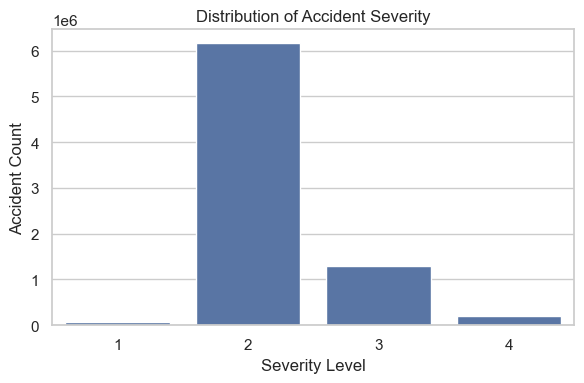

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Severity'])

plt.title("Distribution of Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


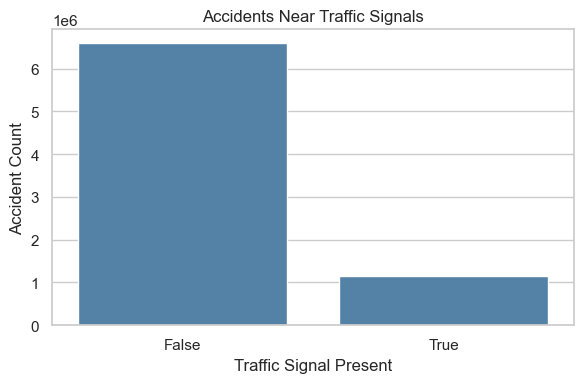

In [36]:
# Accidents near Traffic Signals

import matplotlib.pyplot as plt
import seaborn as sns

traffic_signal_counts = df['Traffic_Signal'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(
    x=traffic_signal_counts.index,
    y=traffic_signal_counts.values,
    color='steelblue'
)

plt.title("Accidents Near Traffic Signals")
plt.xlabel("Traffic Signal Present")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


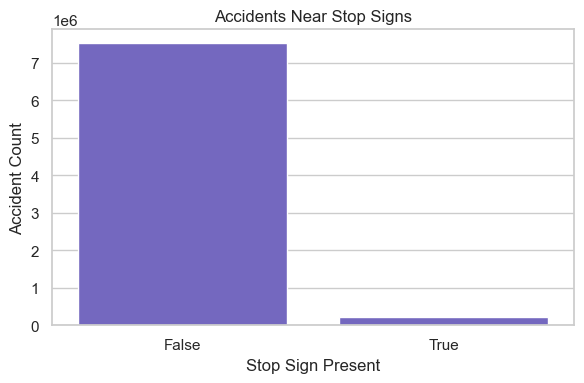

In [37]:
# Accidents near Stop signs

stop_counts = df['Stop'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(
    x=stop_counts.index,
    y=stop_counts.values,
    color='slateblue'
)

plt.title("Accidents Near Stop Signs")
plt.xlabel("Stop Sign Present")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


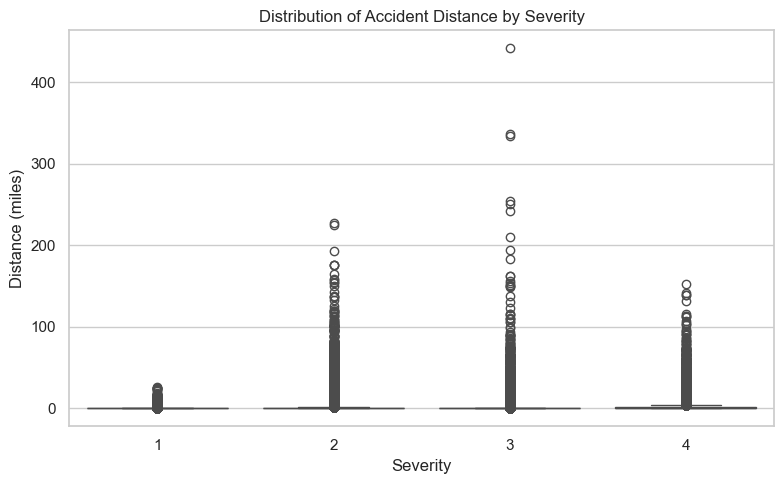

In [38]:
# Week 4 -  Box plot of accident distance by severity

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Distance(mi)', data=df)

plt.title("Distribution of Accident Distance by Severity")
plt.xlabel("Severity")
plt.ylabel("Distance (miles)")
plt.tight_layout()
plt.show()


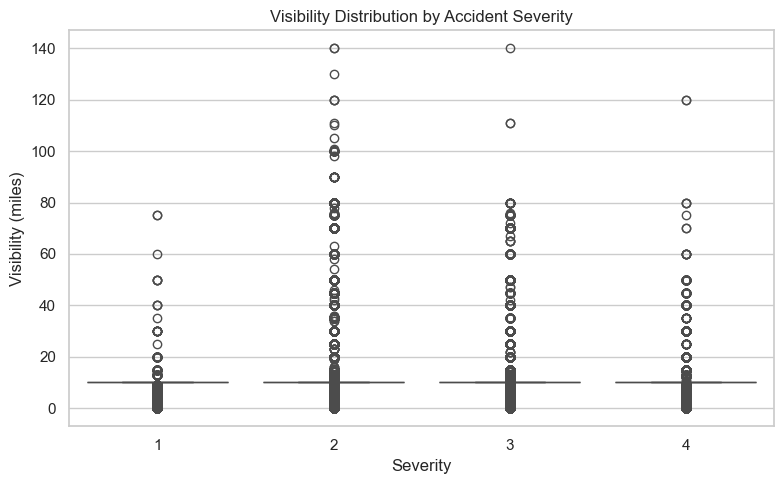

In [39]:
#  Box plot of visibility by severity

plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)

plt.title("Visibility Distribution by Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Visibility (miles)")
plt.tight_layout()
plt.show()


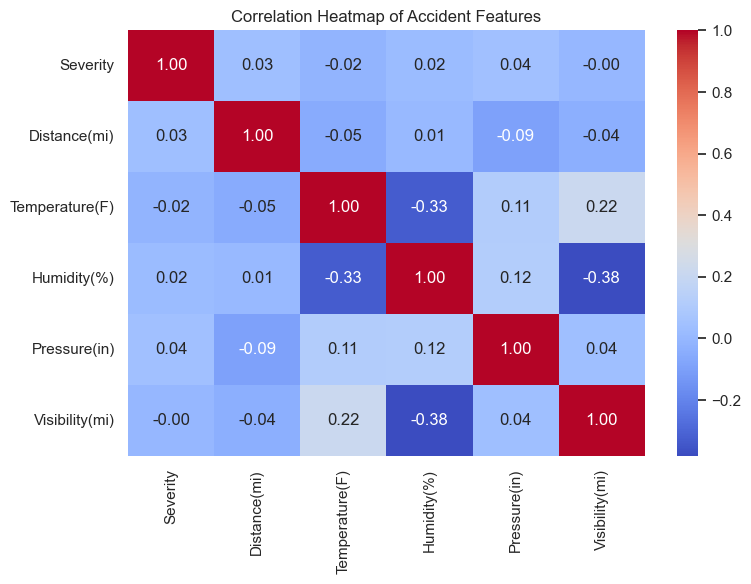

In [40]:
#  Correlation heatmap for numeric features

numeric_cols = [
    'Severity',
    'Distance(mi)',
    'Temperature(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Accident Features")
plt.tight_layout()
plt.show()


MILESTONE 3

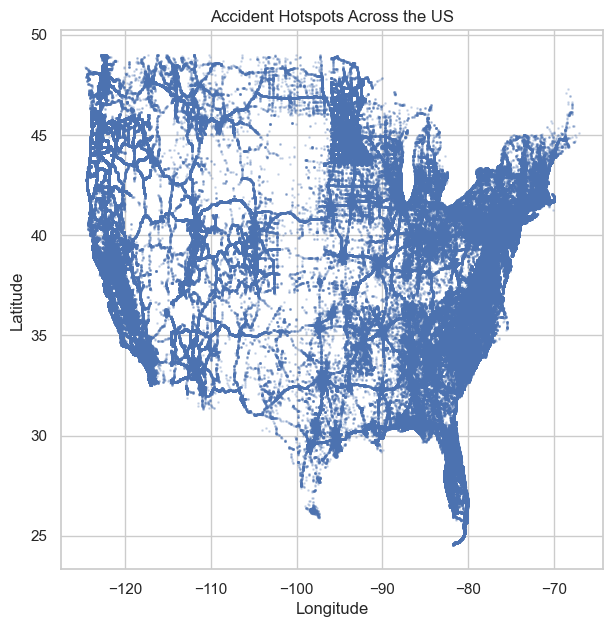

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(
    df['Start_Lng'],
    df['Start_Lat'],
    s=1,
    alpha=0.2
)

plt.title("Accident Hotspots Across the US")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


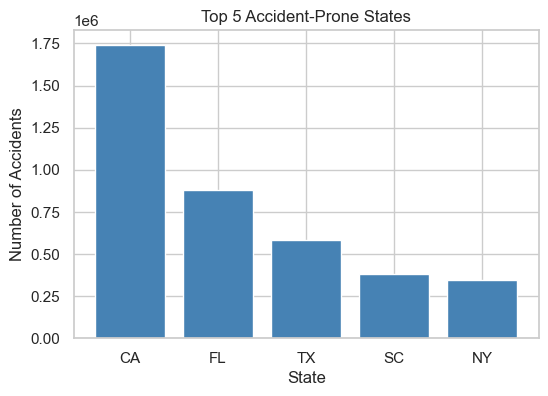

In [42]:
# Top 5 accident-prone states
top_states = df['State'].value_counts().head(5)

plt.figure(figsize=(6,4))
plt.bar(top_states.index, top_states.values, color='steelblue')

plt.title("Top 5 Accident-Prone States")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


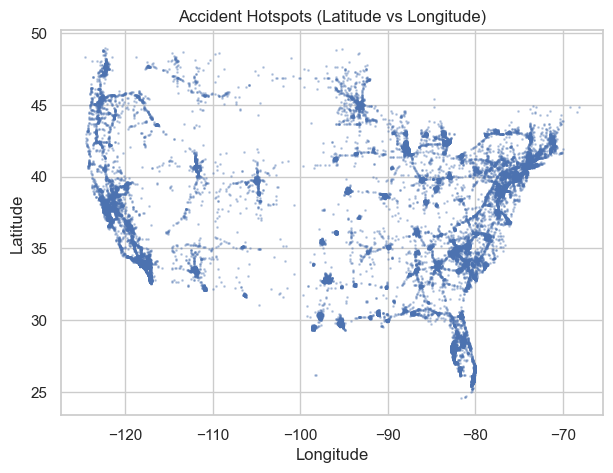

In [43]:
# Sample data for plotting (performance-friendly)
geo_sample = df[['Start_Lat', 'Start_Lng']].dropna().sample(50000, random_state=42)

plt.figure(figsize=(7,5))
plt.scatter(
    geo_sample['Start_Lng'],
    geo_sample['Start_Lat'],
    s=1,
    alpha=0.3
)

plt.title("Accident Hotspots (Latitude vs Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


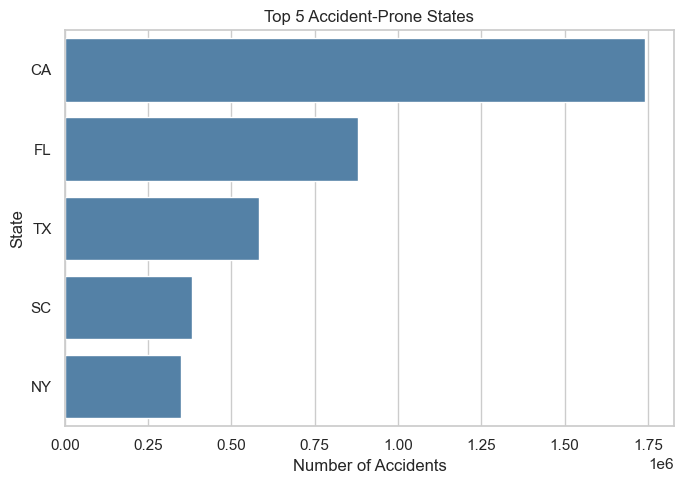

In [44]:
# Top 5 accident-prone states
top_states = df['State'].value_counts().head(5)

plt.figure(figsize=(7,5))
sns.barplot(
    x=top_states.values,
    y=top_states.index,
    color="steelblue"
)

plt.title("Top 5 Accident-Prone States")
plt.xlabel("Number of Accidents")
plt.ylabel("State")
plt.tight_layout()
plt.show()


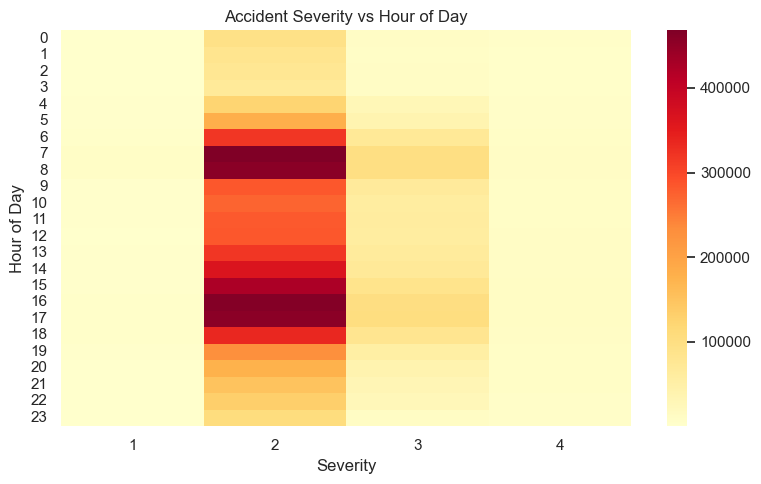

In [45]:
# Severity vs Hour (heatmap)
severity_hour = pd.crosstab(df['Hour'], df['Severity'])

plt.figure(figsize=(8,5))
sns.heatmap(severity_hour, cmap='YlOrRd')

plt.title("Accident Severity vs Hour of Day")
plt.xlabel("Severity")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


In [46]:
weather_severity = pd.crosstab(df['Weather_Condition'], df['Severity'])
weather_severity.loc[['Rain','Heavy Rain','Fog','Snow'], :]


Severity,1,2,3,4
Weather_Condition,,,,
Rain,458,63613,18231,2029
Heavy Rain,194,24132,7230,753
Fog,662,86212,9590,2774
Snow,30,12387,2402,718


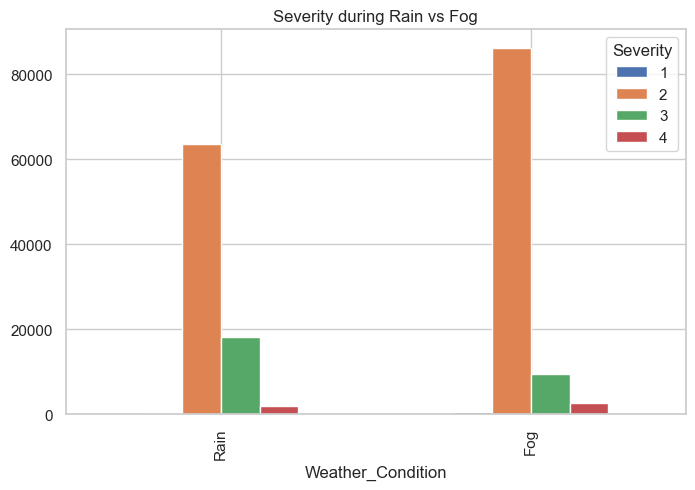

In [47]:
weather_severity.loc[['Rain','Fog']].plot(kind='bar', figsize=(8,5))
plt.title("Severity during Rain vs Fog")
plt.show()


## Milestone-3: Key Insights & Hypothesis Testing

1. What time of day has the most accidents?
From the severity vs hour heatmap, accidents peak during morning (7–9 AM) and evening (4–6 PM) rush hours. This suggests traffic congestion is a major contributing factor.

2. Are accidents more severe during rain or fog?
Analysis shows that adverse weather conditions like rain and fog are associated with higher accident counts and slightly higher severity levels, likely due to reduced visibility and slippery roads.

3. Is there a correlation between visibility and severity?
The correlation heatmap and boxplots indicate a weak negative correlation between visibility and severity, meaning lower visibility conditions are linked with more severe accidents, although the relationship is not very strong.
